# Question 1

In [1]:
from PIL import Image
import numpy as np

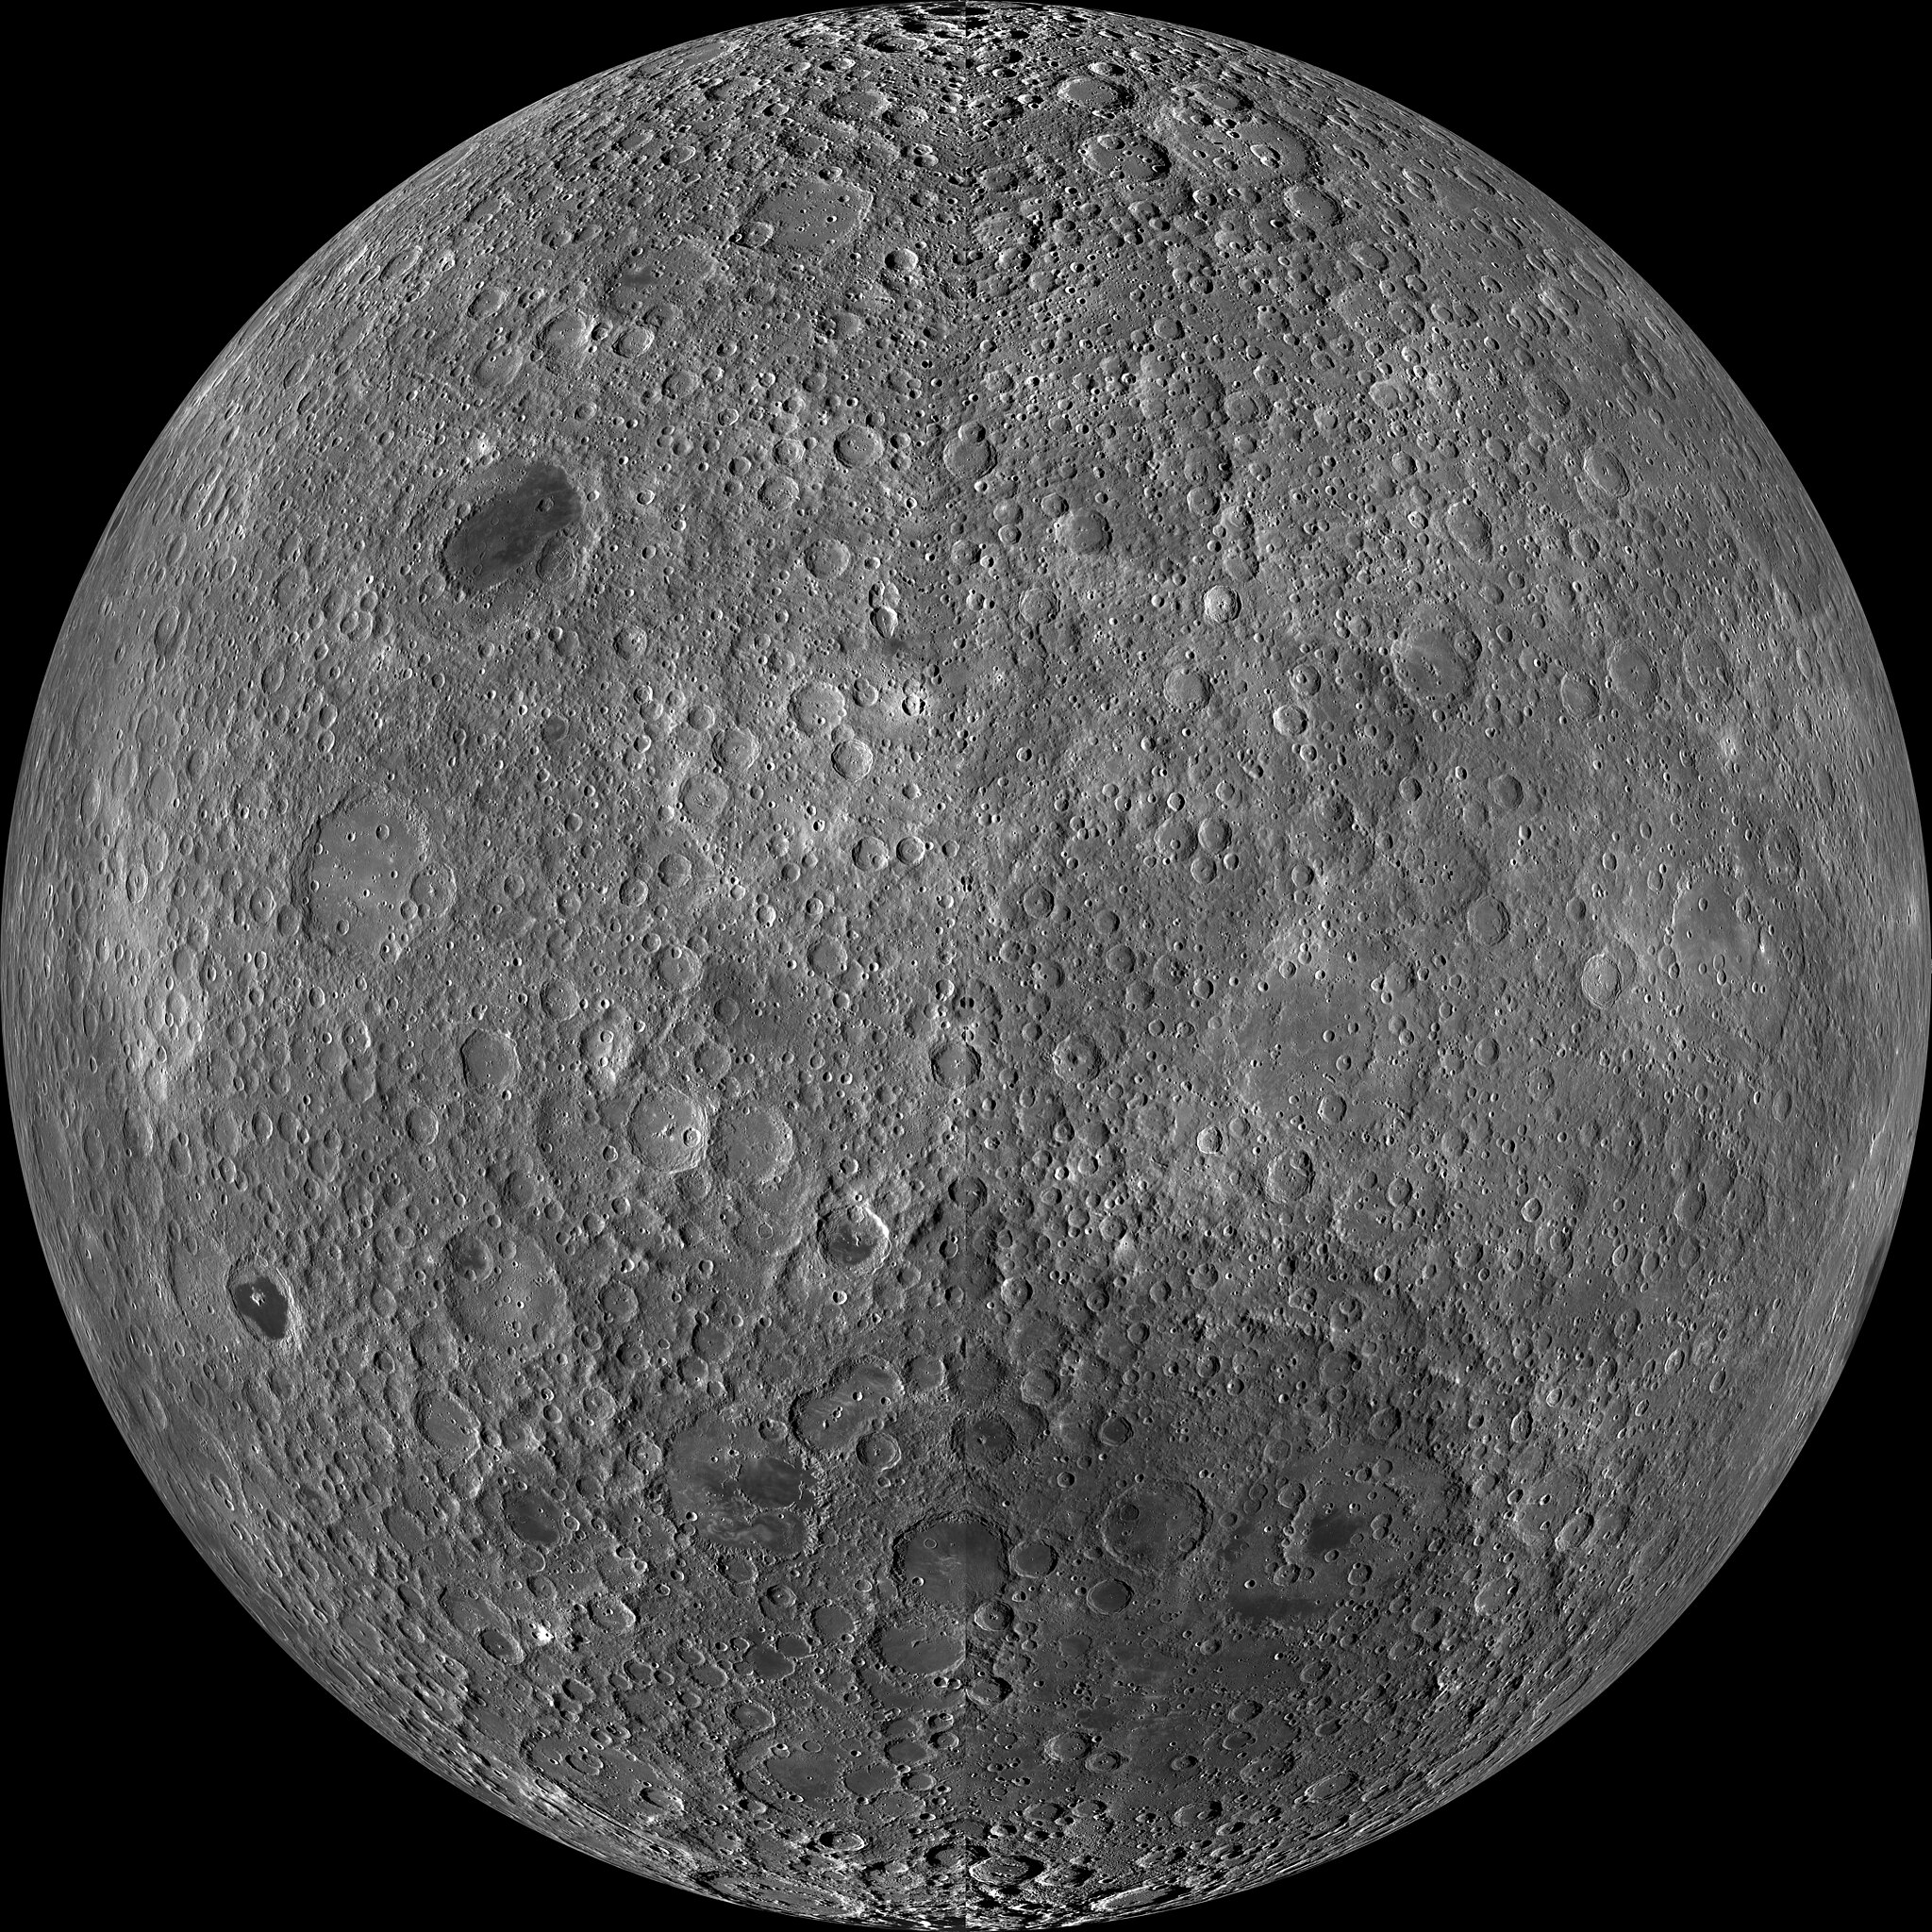

In [3]:
img = Image.open('Moon_Farside_LRO.jpg')
img

In [5]:
img_arr = np.asarray(img)

In [11]:
float_img_arr = img_arr.astype(float)

In [14]:
u, s, v_t = np.linalg.svd(float_img_arr, full_matrices=True)

In [15]:
u

array([[-0.00018427, -0.00063961, -0.00120041, ...,  0.02207593,
         0.05266335,  0.11102383],
       [-0.00101083, -0.00350431, -0.00623126, ..., -0.1009927 ,
        -0.06077857,  0.01541931],
       [-0.00157521, -0.00541355, -0.0089099 , ...,  0.04789997,
         0.00804951,  0.00469358],
       ...,
       [-0.00138072, -0.00498362, -0.0078669 , ..., -0.09288231,
        -0.04921788, -0.02830516],
       [-0.00092135, -0.00338727, -0.00555047, ...,  0.08678874,
         0.02356083,  0.05863743],
       [-0.00054614, -0.00195187, -0.00334084, ...,  0.0842145 ,
         0.07485207,  0.03370992]], shape=(2048, 2048))

In [16]:
s

array([1.74802525e+05, 3.90299233e+04, 2.56863877e+04, ...,
       3.13737806e-01, 2.56845766e-01, 4.16632477e-02], shape=(2048,))

In [17]:
v_t

array([[-5.38416036e-04, -1.61741136e-03, -2.20625072e-03, ...,
        -2.13538934e-03, -1.32795942e-03, -3.04986842e-04],
       [ 2.13530383e-03,  6.36735288e-03,  8.56359696e-03, ...,
         8.36357020e-03,  5.26016784e-03,  1.18275950e-03],
       [-1.53987057e-03, -4.71805131e-03, -6.61622314e-03, ...,
        -6.26820118e-03, -3.81406919e-03, -9.41761561e-04],
       ...,
       [-5.23098768e-01,  8.01471161e-02, -1.04642638e-01, ...,
        -1.37410890e-01,  1.49372106e-01, -1.43756195e-02],
       [-3.33216579e-01,  1.93573628e-01,  1.49116185e-01, ...,
        -1.64432864e-04,  6.19874237e-02, -4.62793448e-02],
       [-2.50812595e-01, -9.53001907e-02,  2.28073660e-01, ...,
         4.67294915e-02,  1.23945520e-02, -1.79837774e-02]],
      shape=(2048, 2048))

In [ ]:
u_t = u.T

array([[-0.00018427, -0.00101083, -0.00157521, ..., -0.00138072,
        -0.00092135, -0.00054614],
       [-0.00063961, -0.00350431, -0.00541355, ..., -0.00498362,
        -0.00338727, -0.00195187],
       [-0.00120041, -0.00623126, -0.0089099 , ..., -0.0078669 ,
        -0.00555047, -0.00334084],
       ...,
       [ 0.02207593, -0.1009927 ,  0.04789997, ..., -0.09288231,
         0.08678874,  0.0842145 ],
       [ 0.05266335, -0.06077857,  0.00804951, ..., -0.04921788,
         0.02356083,  0.07485207],
       [ 0.11102383,  0.01541931,  0.00469358, ..., -0.02830516,
         0.05863743,  0.03370992]], shape=(2048, 2048))

In [22]:
v = v_t.T

In [23]:
m, n = float_img_arr.shape

In [24]:
Im = np.eye(m)
In = np.eye(n)

In [27]:
u_t_dot_u = u_t @ u
v_t_dot_v = v_t @ v

In [28]:
error_u = u_t_dot_u - Im
error_v = v_t_dot_v - In

In [34]:
forb_norm_u = np.linalg.norm(error_u)
forb_norm_v = np.linalg.norm(error_v)

In [35]:
print('The Frobenius norm error for U is ', forb_norm_u)
print('The Frobenius norm error for V is ', forb_norm_v)

The Frobenius norm error for U is  1.7509773104412006e-13
The Frobenius norm error for V is  1.7620736874891093e-13


### Are the values of εU and εV approximately zero?
Yes, these are very small numbers close to zero.
### Why are these errors not exactly zero, even though SVD guarantees orthonormality in exact arithmetic?
When computers use floating point numbers, they are only so percise which results in rounding errors that account for the errors not being exactly zero.
### What fundamental property of the SVD does this experiment verify?
This verifies that both U and V are 'orthonormal'.

# Question 2

f(x) = x * cos(cx)
f'(x) = x * -sin(cx) * c + 1 * cos(cx)
f''(x) = cx * -cos(cx) * c + c * -sin(cx) + -sin(cx) * c
       = c(cx * -cos(cx) - 2sin(cx))
       = -c(cx * cos(cx) + 2sin(cx))

In [ ]:
import matplotlib.pyplot as plt

Converged at iteration 14


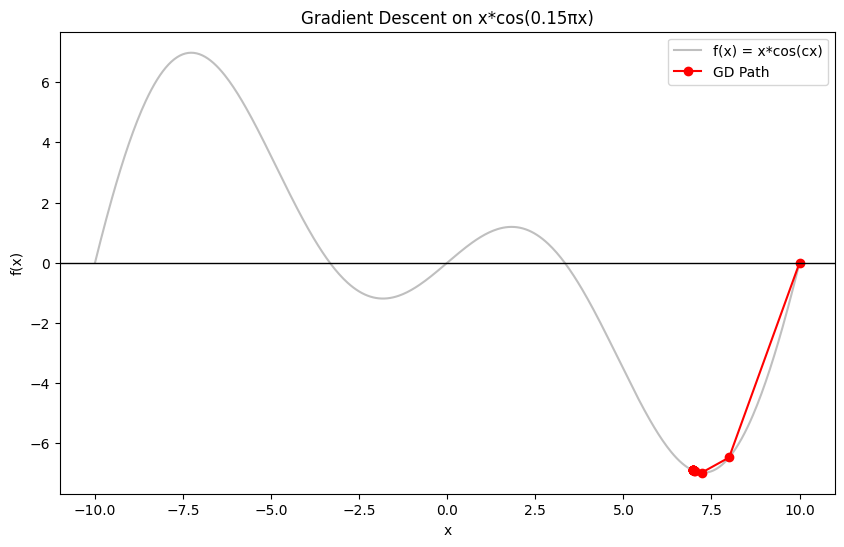

In [39]:
c = np.pi * 0.15
f = lambda x: x * np.cos(c * x)                           # objective
grad = lambda x: np.cos(c * x) - x * np.sin(c * x)        # gradient

x = 10.0                    # initial point
eta = 0.2                   # learning rate
stopping_point = 1e-6
trace = [x]

for i in range(100):
    x_k_plus_one = x - eta * grad(x)
    trace.append(x_k_plus_one)
    
    if abs(x_k_plus_one - x) < stopping_point or abs(grad(x)) < stopping_point:
        print(f"Converged at iteration {i+1}")
        break
    
    x = x_k_plus_one

trace = np.array(trace)

# plot
xs = np.linspace(-10, 10, 500)
plt.figure(figsize=(10, 6))
plt.plot(xs, f(xs), label='f(x) = x*cos(cx)', color='gray', alpha=0.5)
plt.plot(trace, f(trace), 'o-', color='red', label='GD Path')
plt.axhline(0, color='black', lw=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent on x*cos(0.15πx)")
plt.legend()
plt.show()

Converged at iteration 51


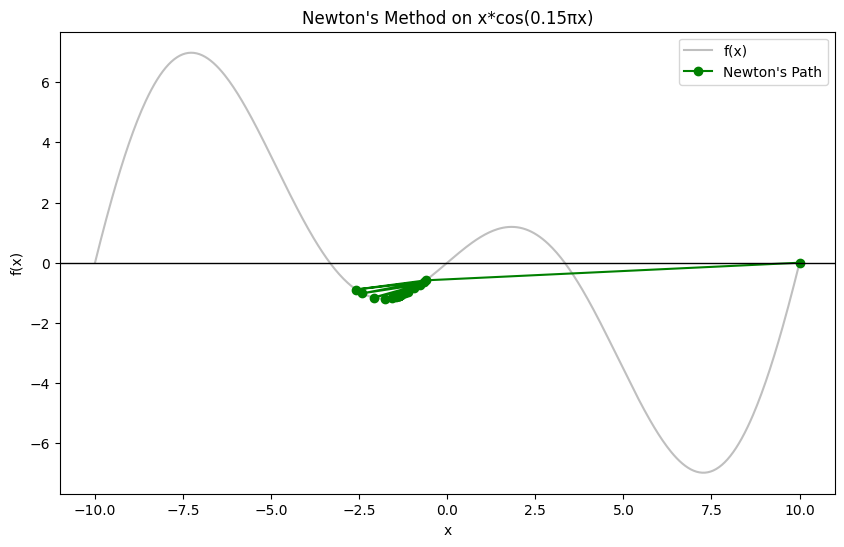

In [69]:
c = np.pi * 0.15
f = lambda x: x * np.cos(c * x)                           # objective
grad = lambda x: np.cos(c * x) - x * np.sin(c * x)        # gradient
hess = lambda x: c * (c * x * -1 * np.cos(c * x) - 2 * np.sin(c * x))

x = 10.0                    # initial point
stopping_point = 1e-6
trace = [x]

for i in range(100):
    x_k_plus_one = x - grad(x) / hess(x)
    trace.append(x_k_plus_one)
    
    if abs(x_k_plus_one - x) < stopping_point or abs(grad(x)) < stopping_point:
        print(f"Converged at iteration {i+1}")
        break
    
    x = x_k_plus_one

trace = np.array(trace)

# plot
xs = np.linspace(-10, 10, 500)
plt.figure(figsize=(10, 6))
plt.plot(xs, f(xs), label='f(x)', color='gray', alpha=0.5)
plt.plot(trace, f(trace), 'o-', color='green', label="Newton's Path")
plt.axhline(0, color='black', lw=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton's Method on x*cos(0.15πx)")
plt.legend()
plt.show()

In [99]:
c = np.pi * 0.15
f = lambda x: x * np.cos(c * x)                           # objective
grad = lambda x: np.cos(c * x) - x * np.sin(c * x)        # gradient
hess = lambda x: c * (c * x * -1 * np.cos(c * x) - 2 * np.sin(c * x))

x1_newt = 10.0                    # initial point
x1_grad = 10.0
x2_newt = 2.0
x2_grad = 2.0
eta = 0.2
stopping_point = 1e-6
trace_x1_grad = [x1_grad]
trace_x2_grad = [x2_grad]
trace_x1_newt = [x1_newt]
trace_x2_newt = [x2_newt]



In [100]:
for i in range(100):
    # Newton's x1 = 10
    x1_newt_k_plus_one = x1_newt - grad(x1_newt) / hess(x1_newt)
    trace_x1_newt.append(x1_newt_k_plus_one)
    
    if abs(x1_newt_k_plus_one - x1_newt) < stopping_point or abs(grad(x1_newt)) < stopping_point:
        print(f"Newton's method for x = 10 converged at iteration {i+1}")
        break
    
    x1_newt = x1_newt_k_plus_one

trace_x1_newt = np.array(trace_x1_newt)

Newton's method for x = 10 converged at iteration 51


In [101]:
for i in range(100):
    # Newton's x2 = 2
    x2_newt_k_plus_one = x2_newt - grad(x2_newt) / hess(x2_newt)
    trace_x2_newt.append(x2_newt_k_plus_one)
    
    if abs(x2_newt_k_plus_one - x2_newt) < stopping_point or abs(grad(x2_newt)) < stopping_point:
        print(f"Newton's method for x = 2 converged at iteration {i+1}")
        break
    
    x2_newt = x2_newt_k_plus_one

trace_x2_newt = np.array(trace_x2_newt)

Newton's method for x = 2 converged at iteration 45


In [102]:
for i in range(100):
    # Gradient x1 = 10
    x1_grad_k_plus_one = x1_grad - eta * grad(x1_grad)
    trace_x1_grad.append(x1_grad_k_plus_one)
    
    if abs(x1_grad_k_plus_one - x1_grad) < stopping_point or abs(grad(x1_grad)) < stopping_point:
        print(f"Gradient method for x = 10 converged at iteration {i+1}")
        break
    
    x1_grad = x1_grad_k_plus_one

trace_x1_grad = np.array(trace_x1_grad)

Gradient method for x = 10 converged at iteration 14


In [103]:
for i in range(100):
    # Gradient x1 = 2
    x2_grad_k_plus_one = x2_grad - eta * grad(x2_grad)
    trace_x2_grad.append(x2_grad_k_plus_one)
    
    if abs(x2_grad_k_plus_one - x2_grad) < stopping_point or abs(grad(x2_grad)) < stopping_point:
        print(f"Gradient method for x = 2 converged at iteration {i+1}")
        break
    
    x2_grad = x2_grad_k_plus_one

trace_x2_grad = np.array(trace_x2_grad)

Gradient method for x = 2 converged at iteration 21


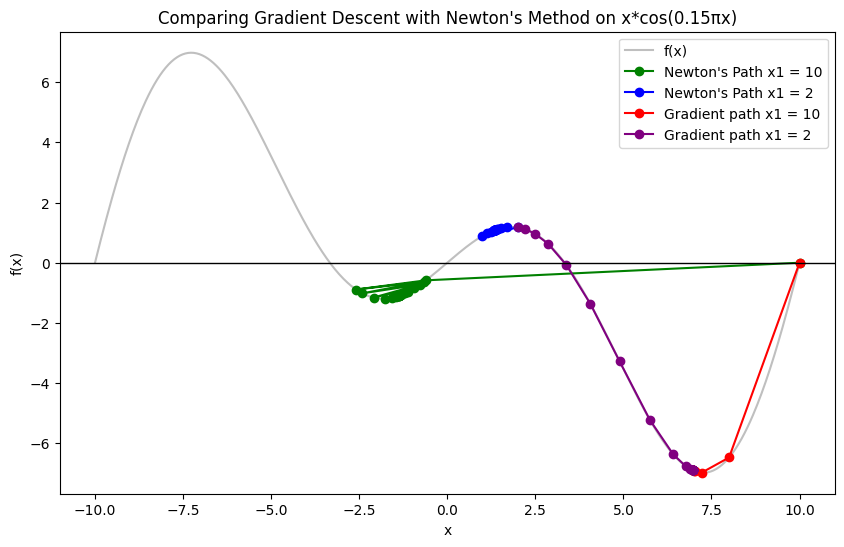

In [98]:
# plot
xs = np.linspace(-10, 10, 500)
plt.figure(figsize=(10, 6))
plt.plot(xs, f(xs), label='f(x)', color='gray', alpha=0.5)
plt.plot(trace_x1_newt, f(trace_x1_newt), 'o-', color='green', label="Newton's Path x1 = 10")
plt.plot(trace_x2_newt, f(trace_x2_newt), 'o-', color='blue', label="Newton's Path x1 = 2")
plt.plot(trace_x1_grad, f(trace_x1_grad), 'o-', color='red', label="Gradient path x1 = 10")
plt.plot(trace_x2_grad, f(trace_x2_grad), 'o-', color='purple', label="Gradient path x1 = 2")
plt.axhline(0, color='black', lw=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Comparing Gradient Descent with Newton's Method on x*cos(0.15πx)")
plt.legend()
plt.show()

### Compare the two methods with respect to:
    • Speed of convergence,
    • Sensitivity to initialization

I had thought that Newton's method was supposed to be faster in general. For this function, Newton's method took more iterations for both initial values. I think that's because Newton's method is more sensitive to 'initialization'. Because it uses the second derivative, it will converge on wherever the slope is zero, even if it is a maximum instead of a minimun such as with x = 2 in this example. Also, if your starting point is near an inflection point, it can cause problems (division by 0)

### Discussion
    • What do I believe I did well on this assignment?
    • What was the most challenging part of this assignment?
    • What would have made this assignment a better experience?
    • What do I need help with?

I think I did well on question 1. It really helped me understand SVD a little more.

The most challenging part of this assignment for me was figuring out why Newton's method wasn't converging as fast since in the class example with f(x) = x**2, it converged in only one step.

I think for me, using a higher degree polynomial instead of a trig function would have helped me focus more on the mechanics of how the two methods worked.

I'm only guessing as to why the Newton's method didn't converge as fast based on what I learned from Gemini and my limited understanding of the readings, so I could use some further insight.